

> Firstly I have generated frames of a generic highway video showing cars downloaded from royalty and copyright free video sharing website : https://www.pexels.com/video/a-double-lane-highway-for-road-travelers-4261446/


Importing librarys

In [ ]:
import cv2 

In [ ]:
import os

Extracting frames function

In [ ]:
def extractFrames(pathIn, pathOut):
    os.mkdir(pathOut)
 
    cap = cv2.VideoCapture(pathIn)
    count = 0
 
    while (cap.isOpened()):
 
        # Capture frame-by-frame
        ret, frame = cap.read()
 
        if ret == True:
            print('Read %d frame: ' % count, ret)
            cv2.imwrite(os.path.join(pathOut, "frame{:d}.jpg".format(count)), frame)  # save frame as JPEG file
            count += 1
        else:
            break
 
    # When everything done, release the capture
    cap.release()
    cv2.destroyAllWindows()

In [ ]:
def main():
    extractFrames('road1.mp4','data')
 
if __name__=="__main__":
    main()

Read 0 frame:  True
Read 1 frame:  True
Read 2 frame:  True
Read 3 frame:  True
Read 4 frame:  True
Read 5 frame:  True
Read 6 frame:  True
Read 7 frame:  True
Read 8 frame:  True
Read 9 frame:  True
Read 10 frame:  True
Read 11 frame:  True
Read 12 frame:  True
Read 13 frame:  True
Read 14 frame:  True
Read 15 frame:  True
Read 16 frame:  True
Read 17 frame:  True
Read 18 frame:  True
Read 19 frame:  True
Read 20 frame:  True
Read 21 frame:  True
Read 22 frame:  True
Read 23 frame:  True
Read 24 frame:  True
Read 25 frame:  True
Read 26 frame:  True
Read 27 frame:  True
Read 28 frame:  True
Read 29 frame:  True
Read 30 frame:  True
Read 31 frame:  True
Read 32 frame:  True
Read 33 frame:  True
Read 34 frame:  True
Read 35 frame:  True
Read 36 frame:  True
Read 37 frame:  True
Read 38 frame:  True
Read 39 frame:  True
Read 40 frame:  True
Read 41 frame:  True
Read 42 frame:  True
Read 43 frame:  True
Read 44 frame:  True
Read 45 frame:  True
Read 46 frame:  True
Read 47 frame:  True
Re

Generated 765 frames and stored in 'data' folder

Importing additional librarys

In [ ]:
import re
import numpy as np
from os.path import isfile, join
import matplotlib.pyplot as plt

In [ ]:
# get file names of the frames
col_frames = os.listdir('data/')

# sort file names
col_frames.sort(key=lambda f: int(re.sub('\D', '', f)))

# empty list to store the frames
col_images=[]

for i in col_frames:
    # read the frames
    img = cv2.imread('data/'+i)
    # append the frames to the list
    col_images.append(img)

Data Exploration
> Let’s display two consecutive frames:



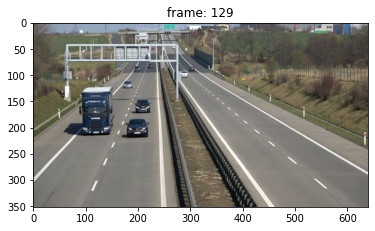

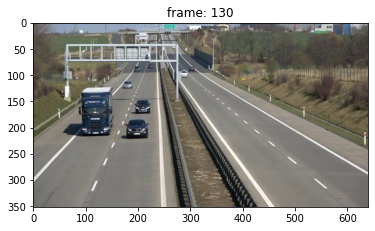

In [ ]:
# plot 129th frame
i = 129

for frame in [i, i+1]:
    plt.imshow(cv2.cvtColor(col_images[frame], cv2.COLOR_BGR2RGB))
    plt.title("frame: "+str(frame))
    plt.show()

Taking the difference of the pixel values of two consecutive frames will help us observe the moving objects

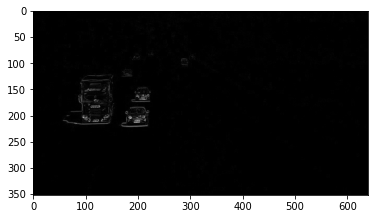

In [ ]:
grayA = cv2.cvtColor(col_images[i], cv2.COLOR_BGR2GRAY)
grayB = cv2.cvtColor(col_images[i+1], cv2.COLOR_BGR2GRAY)

# plot the image after frame differencing
plt.imshow(cv2.absdiff(grayB, grayA), cmap = 'gray')
plt.show()

Applying thresholding

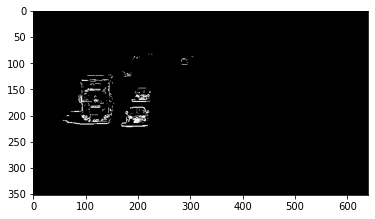

In [ ]:
diff_image = cv2.absdiff(grayB, grayA)

# perform image thresholding
ret, thresh = cv2.threshold(diff_image, 30, 255, cv2.THRESH_BINARY)

# plot image after thresholding
plt.imshow(thresh, cmap = 'gray')
plt.show()

Appling image dilation to smoothen over this image

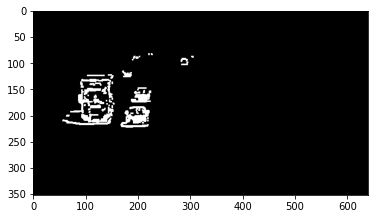

In [ ]:
# apply image dilation
kernel = np.ones((3,3),np.uint8)
dilated = cv2.dilate(thresh,kernel,iterations = 1)

# plot dilated image
plt.imshow(dilated, cmap = 'gray')
plt.show()

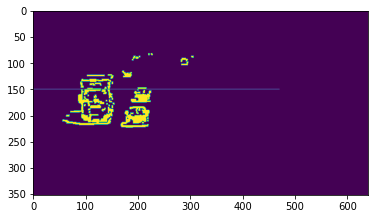

In [ ]:
# plot vehicle detection zone
plt.imshow(dilated)
cv2.line(dilated, (0, 150),(470,150),(100, 0, 0))
plt.show()

All the contours are kept in the variable ‘contours’

In [ ]:
# find contours
contours, hierarchy = cv2.findContours(thresh.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)

bounding some extra rules for better output

In [ ]:
valid_cntrs = []

for i,cntr in enumerate(contours):
    x,y,w,h = cv2.boundingRect(cntr)
    if (x <= 550) & (y >= 150) & (cv2.contourArea(cntr) >= 25):
        valid_cntrs.append(cntr)



Plotting contours

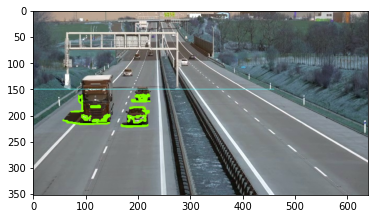

In [ ]:
dmy = col_images[129].copy()

cv2.drawContours(dmy, valid_cntrs, -1, (127,500,0), 2)
cv2.line(dmy, (0, 150),(460,150),(100, 255, 255))
plt.imshow(dmy)
plt.show()

Applying the same image transformations and pre-processing operations on all the frames and find the desired contours

In [ ]:
# kernel for image dilation
kernel = np.ones((4,4),np.uint8)

# font style
font = cv2.FONT_HERSHEY_SIMPLEX

# directory to save the ouput frames
pathIn = "data/"

for i in range(len(col_images)-1):
    
    # frame differencing
    grayA = cv2.cvtColor(col_images[i], cv2.COLOR_BGR2GRAY)
    grayB = cv2.cvtColor(col_images[i+1], cv2.COLOR_BGR2GRAY)
    diff_image = cv2.absdiff(grayB, grayA)
    
    # image thresholding
    ret, thresh = cv2.threshold(diff_image, 30, 255, cv2.THRESH_BINARY)
    
    # image dilation
    dilated = cv2.dilate(thresh,kernel,iterations = 1)
    
    # find contours
    contours, hierarchy = cv2.findContours(dilated.copy(), cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
    
    # shortlist contours appearing in the detection zone
    valid_cntrs = []
    for cntr in contours:
        x,y,w,h = cv2.boundingRect(cntr)
        if (x <= 460) & (y >= 150) & (cv2.contourArea(cntr) >= 25):
            if (y >= 160) & (cv2.contourArea(cntr) < 40):
                break
            valid_cntrs.append(cntr)
            
    # add contours to original frames
    dmy = col_images[i].copy()
    cv2.drawContours(dmy, valid_cntrs, -1, (127,200,0), 2)
    
    #cv2.putText(dmy, "vehicles detected: " + str(len(valid_cntrs)), (55, 15), font, 0.6, (0, 180, 0), 2)
    cv2.line(dmy, (0, 150),(470,150),(100, 255, 255))
    cv2.imwrite(pathIn+str(i)+'.png',dmy)  

Stacking up the frames to recreate the video

In [ ]:
# specify video name
pathOut = 'vehicle_detection_v4.mp4'

fps = 30.0

Reading the final frames in list

In [ ]:
frame_array = []
files = [f for f in os.listdir(pathIn) if isfile(join(pathIn, f))]

In [ ]:
files.sort(key=lambda f: int(re.sub('\D', '', f)))

for i in range(len(files)):
    filename=pathIn + files[i]
    
    #read frames
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    
    #inserting the frames into an image array
    frame_array.append(img)

Generating the output video

In [ ]:
out = cv2.VideoWriter(pathOut,cv2.VideoWriter_fourcc(*'DIVX'), fps, size)

for i in range(len(frame_array)):
    # writing to a image array
    out.write(frame_array[i])

out.release()